In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv('heart_disease_dataset_UCI.csv')

For complete dataset description you can visit this site https://archive.ics.uci.edu/ml/datasets/heart+disease


# Data Exploration

In [2]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataframe.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


# Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

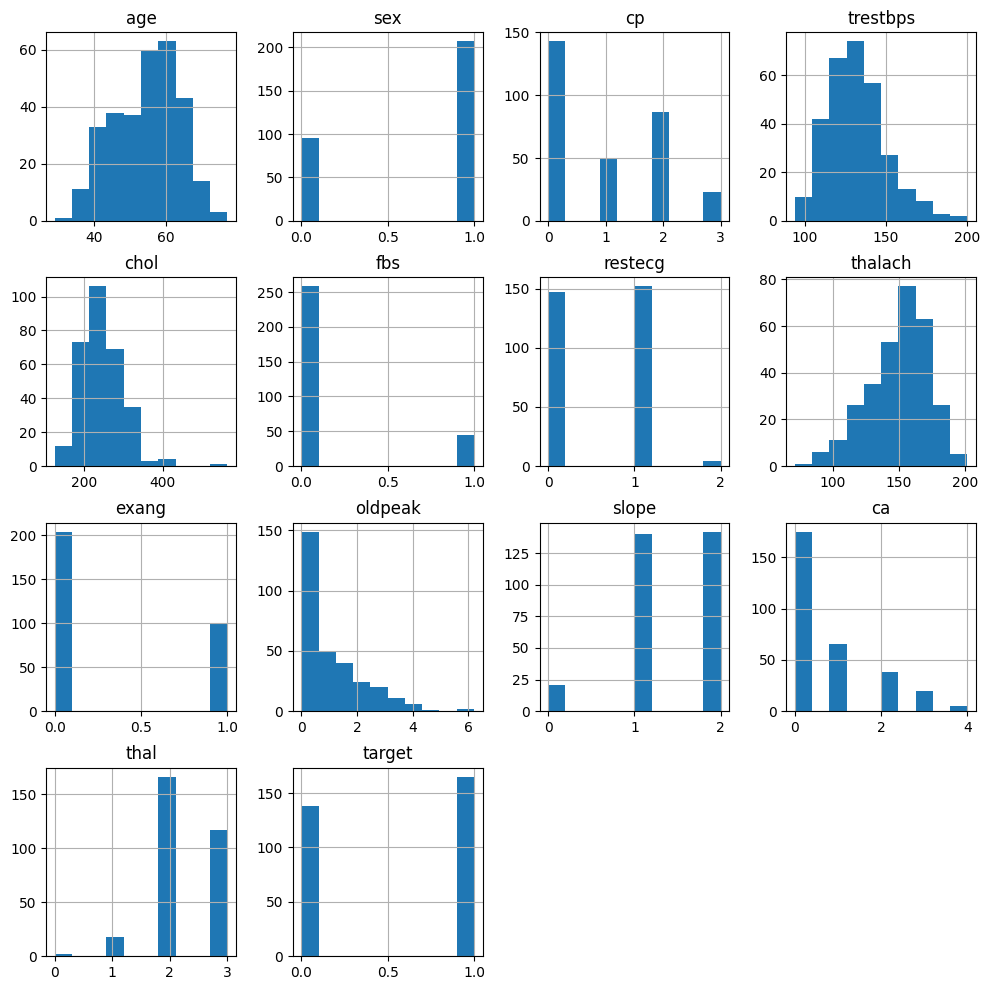

In [ ]:
dataframe.hist(figsize=(12,12))

# Data Pre Processing

In [5]:
X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

# Model Prediction

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=1.0,class_weight='balanced',max_iter=100,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [9]:
model1=lr.fit(X_train,y_train)
model1.score(X_train, y_train)


0.8458149779735683

In [10]:
prediction1=model1.predict(X_test)

<Axes: >

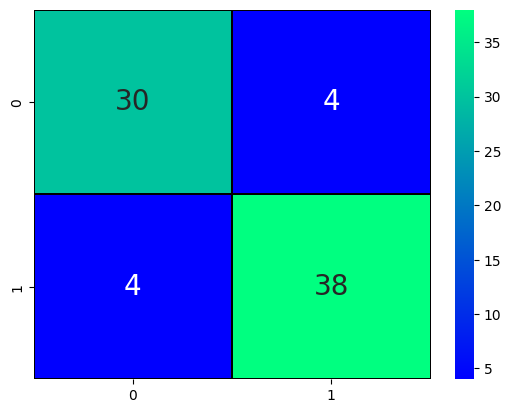

In [ ]:
# Confusion Matrix
cm=confusion_matrix(y_test,prediction1)
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
linecolor='black',annot_kws={"size":20})

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8947368421052632
Testing Sensitivity for logistic Regression: 0.8823529411764706
Testing Specificity for Logistic Regression: 0.9047619047619048
Testing Precision for Logistic Regression 0.8823529411764706


In [ ]:
func (y, a):
  L= -y ln (a) - (1-y) ln (a)
  return L

**Precision** basically tells us that out of the results classified as positive by our model, how many were actually positive.

**Recall/ Sensitivity** tells us how many true positives (points labelled as positive) were recalled or found by our model.

# References
https://www.analyticsvidhya.com/blog/2022/03/logistic-regression-on-uci-dataset/


https://www.kaggle.com/code/arviinndn/heart-disease-prediction-uci-dataset/notebook
